In [1]:
from autofeatinsights.autofeat_class import FeatureDiscovery

/home/zeger/AutoFeatPackage/.venv/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
autofeat = FeatureDiscovery()
autofeat.set_base_table(base_table="school_best/base.csv", target_column="class")
autofeat.set_dataset_repository(dataset_repository=["school_best"])

In [3]:
# autofeat.find_relationships()
autofeat.read_relationships()

displaying weights


/home/zeger/AutoFeatPackage/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeger/AutoFeatPackage/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeger/AutoFeatPackage/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeger/AutoFeatPackage/.venv/lib/python3.11/site-packages/IPython/cor

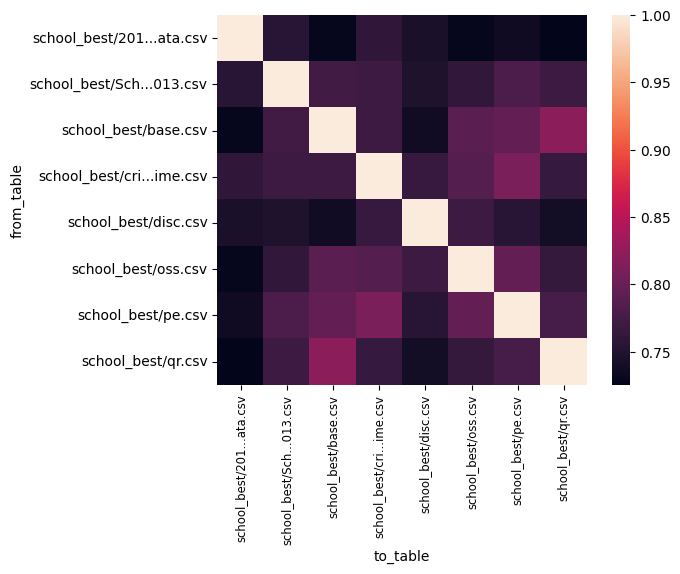

{'school_best/pe.csv': 'school_best/pe.csv', 'school_best/crime.csv': 'school_best/cri...ime.csv', 'school_best/oss.csv': 'school_best/oss.csv', 'school_best/disc.csv': 'school_best/disc.csv', 'school_best/2010_Gen_Ed_Survey_Data.csv': 'school_best/201...ata.csv', 'school_best/qr.csv': 'school_best/qr.csv', 'school_best/Schools_Progress_Report_2012-2013.csv': 'school_best/Sch...013.csv', 'school_best/base.csv': 'school_best/base.csv'}


In [4]:
autofeat.display_relationships()
print(autofeat.weight_string_mapping)
# Heatmap with matplotlib or seaborn

In [5]:
# autofeat.add_relationship(from_table="credit/table_0_0.csv", from_feature="key_0_0", to_table="credit/table_1_1.csv", to_feature="key_0_0", weight_value=0.8)
# autofeat.remove_relationship(from_table="credit/table_0_0.csv", from_feature="key_0_0", to_table="credit/table_1_1.csv", to_feature="key_0_0")
# autofeat.update_relationship(from_table="credit/table_0_0.csv", from_feature="key_0_0", to_table="credit/table_1_1.csv", to_feature="key_0_0", weight_value=0.8)
#Check if table notation is understandable
# update_relationship is the same now as add_relationship

In [6]:
autofeat.compute_join_paths()

# No top_k here?

INFO:root:Step 2: Calculating paths
/home/zeger/AutoFeatPackage/.venv/lib/python3.11/site-packages/pandas/core/arrays/base.py:530: RuntimeWarning: invalid value encountered in cast
  result = np.asarray(self, dtype=dtype)


In [ ]:
autofeat.display_join_paths_networkx(top_k=2)
#Dsplot.Graph

In [ ]:
# autofeat.paths[0].joins.remove(0)

autofeat.inspect_join_path(path_id=0)
# # Shows all the joins in the path with ids
# autofeat.remove_join(path_id=0, join_id=0)
# autofeat.add_join(path=0, from_table="credit/table_0_0", to_table, from_feature, to_feature)
# Recalculate selected and discarded_features with both remove and add
df = autofeat.materialise_join_path(path_id=0)
display(df)



In [ ]:
autofeat.evaluate_paths(algorithm="GBM", top_k=10, verbose=True)
autofeat.evaluate_table(algorithm="GBM", path_id=0, verbose=False)
# run materilise_join_path, evaluate and show results
# Evaluate_table just returns the result of the evaluation
# Evaluate paths returns a dataframe with the results of the evaluation

In [ ]:
df = autofeat.show_features(path_id=0, show_discarded_features=True)
df.style
display(df)
tabulate(df)
# Dataframe

In [ ]:
autofeat.add_features(path_id=0, features=["key_0_0", "key_1_1"])
autofeat.remove_features(path_id=0, features=["key_0_0", "key_1_1"])
# Move features between selected and discarded

In [ ]:
autofeat.explain_path(path_id=0)
autofeat.explain_relationship(relationship_id=0)
autofeat.explain_result(result_id=0)

In [ ]:
autofeat.results.results[8].showTable()

+------------------------------------------+-------------+--------------+----------------+
| Key                                      |   Relevance |   Redundancy |   Data Quality |
+==========================================+=============+==============+================+
| credit/table_1_2.csv.existing_credits    |  0.0631081  |    0         |              1 |
+------------------------------------------+-------------+--------------+----------------+
| credit/table_1_2.csv.other_payment_plans |  0.0598497  |    1         |              1 |
+------------------------------------------+-------------+--------------+----------------+
| credit/table_1_2.csv.own_telephone       |  0.0385716  |    0.541063  |              1 |
+------------------------------------------+-------------+--------------+----------------+
| credit/table_1_2.csv.Key_1_2             |  0.026027   |    0.824921  |              1 |
+------------------------------------------+-------------+--------------+----------------+

In [ ]:
autofeat.addTable("school", "qr.csv")


In [ ]:
autofeat.addFeature("credit", "table_0_0.csv", "key_0_0")

In [ ]:
autofeat.runAllComa()

INFO:root:Step 1: Running COMA on all 28 combinations of tables
100%|██████████| 28/28.0 [00:16<00:00,  1.70it/s]


In [ ]:
autofeat.weights.explain()
print(str(autofeat.weights))

Weights:
 	Weight from credit/table_1_1.csv.Key_0_0 to credit/table_0_0.csv.Key_0_0 with weight 0.79540735
 	Weight from credit/table_0_0.csv.Key_0_0 to credit/table_1_1.csv.Key_0_0 with weight 0.79540735
 	Weight from credit/table_1_1.csv.Key_0_0 to credit/table_1_2.csv.Key_0_0 with weight 0.83784163
 	Weight from credit/table_1_2.csv.Key_0_0 to credit/table_1_1.csv.Key_0_0 with weight 0.83784163
 	Weight from credit/table_1_1.csv.Key_1_1 to credit/table_1_2.csv.Key_1_2 with weight 0.64531296
 	Weight from credit/table_1_2.csv.Key_1_2 to credit/table_1_1.csv.Key_1_1 with weight 0.64531296
 	Weight from credit/table_1_1.csv.other_parties to credit/table_1_2.csv.other_payment_plans with weight 0.53475636
 	Weight from credit/table_1_2.csv.other_payment_plans to credit/table_1_1.csv.other_parties with weight 0.53475636
 	Weight from credit/table_1_1.csv.Key_1_1 to credit/table_2_3.csv.Key_1_1 with weight 0.79203916
 	Weight from credit/table_2_3.csv.Key_1_1 to credit/table_1_1.csv.Key_1_

In [ ]:
autofeat.weights.weights[1].explain()

'This weight is calculated by the COMA algorithm. This calculates the similarity between the columns of the tables. The higher the similarity, the higher the weight. \n The weight from credit/table_0_0.csv.Key_0_0 to credit/table_1_1.csv.Key_0_0 is 0.79540735.'

In [ ]:
autofeat.results.explain()

"The results are calculated by evaluating each path with the AutoML algorithm AutoGluon. \n The AutoML algorithm is run on all 12 paths. \n The best result is 0.73 with the path Begin: table_0_0.csv\n \tJoin from table_0_0.csv.Key_0_0 to table_1_2.csv.Key_0_0 with data quality 1.0 and rel_red {'rel': [('credit/table_1_2.csv.existing_credits', 0.0631080595227251), ('credit/table_1_2.csv.other_payment_plans', 0.05984967729451027), ('credit/table_1_2.csv.own_telephone', 0.038571563937965236), ('credit/table_1_2.csv.Key_1_2', 0.026026953206243004)], 'red': [('credit/table_1_2.csv.other_payment_plans', 1.0), ('credit/table_1_2.csv.Key_1_2', 0.8249211142809424), ('credit/table_1_2.csv.own_telephone', 0.5410627705583873)]}\n \tJoin from table_0_0.csv.Key_0_0 to table_1_1.csv.Key_0_0 with data quality 1.0 and rel_red {'rel': [('credit/table_1_1.csv.job', 0.05960655038758086), ('credit/table_1_1.csv.Key_1_1', 0.028905448545410828), ('credit/table_1_1.csv.other_parties', 0.015129962479337808), (

In [ ]:
autofeat.results.results[4].explain()

"The result is calculated by evaluating the path with the AutoML algorithm AutoGluon. \n The AutoML algorithm is run on the path Begin: table_0_0.csv\n \tJoin from table_0_0.csv.Key_0_0 to table_1_2.csv.Key_0_0 with data quality 1.0 and rel_red {'rel': [('credit/table_1_2.csv.existing_credits', 0.0631080595227251), ('credit/table_1_2.csv.other_payment_plans', 0.05984967729451027), ('credit/table_1_2.csv.own_telephone', 0.038571563937965236), ('credit/table_1_2.csv.Key_1_2', 0.026026953206243004)], 'red': [('credit/table_1_2.csv.other_payment_plans', 1.0), ('credit/table_1_2.csv.Key_1_2', 0.8249211142809424), ('credit/table_1_2.csv.own_telephone', 0.5410627705583873)]}\n \tJoin from table_0_0.csv.Key_0_0 to table_1_1.csv.Key_0_0 with data quality 1.0 and rel_red {'rel': [('credit/table_1_1.csv.job', 0.05960655038758086), ('credit/table_1_1.csv.Key_1_1', 0.028905448545410828), ('credit/table_1_1.csv.other_parties', 0.015129962479337808), ('credit/table_1_1.csv.housing', 0.008937831294583

In [ ]:
autofeat.results.results[4].path.explain()

'The path starts at the table table_0_0.csv. \n The path has the following joins: \n \t from (table.column) credit/table_0_0.csv.Key_0_0 to  (table.column)credit/table_1_2.csv.Key_0_0\n \t from (table.column) credit/table_0_0.csv.Key_0_0 to  (table.column)credit/table_1_1.csv.Key_0_0\n The rank of the path is None.'

In [ ]:
autofeat.results.results[4].path.path[1].explain()

TypeError: bad operand type for unary +: 'str'

In [ ]:
print(autofeat.results.results[8].path.features)

['credit/table_0_0.csv.residence_since', 'credit/table_0_0.csv.num_dependents', 'credit/table_0_0.csv.employment', 'credit/table_0_0.csv.Key_0_0', 'credit/table_1_2.csv.other_payment_plans', 'credit/table_1_2.csv.Key_1_2', 'credit/table_1_2.csv.own_telephone', 'credit/table_1_1.csv.other_parties', 'credit/table_1_1.csv.housing', 'credit/table_1_1.csv.Key_1_1', 'credit/table_2_3.csv.foreign_worker', 'credit/table_2_3.csv.property_magnitude', 'credit/table_2_5.csv.checking_status', 'credit/table_2_5.csv.duration', 'credit/table_2_5.csv.credit_amount', 'credit/table_2_5.csv.savings_status']
